In [2]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.8 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import random
from faker import Faker

In [21]:
# Initialize Faker
faker = Faker()

# Number of rows
num_rows = random.randint(1000, 1300)

# Define features
plant_types = ["Wheat", "Rice", "Tomato", "Corn", "Potato"]
regions = ["North", "South", "East", "West"]
soil_types = ["Sandy", "Loamy", "Clay", "Silty"]
disease_types = ["Fungal", "Bacterial", "Viral", "None"]

# Generate synthetic dataset
data = {
    "Plant Type": [random.choice(plant_types) for _ in range(num_rows)],
    "Region": [random.choice(regions) for _ in range(num_rows)],
    "Soil Type": [random.choice(soil_types) for _ in range(num_rows)],
    "Temperature (C)": [round(random.uniform(15, 40), 2) for _ in range(num_rows)],
    "Humidity (%)": [round(random.uniform(30, 90), 2) for _ in range(num_rows)],
    "Rainfall (mm)": [round(random.uniform(500, 2000), 2) for _ in range(num_rows)],
    "pH Level": [round(random.uniform(4.5, 8.5), 2) for _ in range(num_rows)],
    "Nutrient Level": [round(random.uniform(10, 100), 2) for _ in range(num_rows)],
    "Sunlight Exposure (hrs)": [round(random.uniform(4, 12), 2) for _ in range(num_rows)],
    "Pest Presence": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "Disease Symptoms": [random.choice(["Spots", "Discoloration", "Wilting", "None"]) for _ in range(num_rows)],
    "Leaf Area (cm²)": [round(random.uniform(20, 200), 2) for _ in range(num_rows)],
    "Disease Type": [random.choice(disease_types) for _ in range(num_rows)],
    "Yield (kg/acre)": [round(random.uniform(500, 3000), 2) for _ in range(num_rows)],
    "Disease Severity": [random.choice(range(1, 11)) for _ in range(num_rows)],
}

# Create DataFrame
df = pd.DataFrame(data)

In [22]:
# Introduce inconsistencies
# 1. Missing values
for _ in range(int(0.05 * num_rows)):  # 5% missing values
    df.iloc[random.randint(0, num_rows - 1), random.randint(0, len(df.columns) - 1)] = np.nan

# 2. Duplicates
df = pd.concat([df, df.sample(10)])  # Add 10 duplicate rows

# 3. Outliers
df.loc[random.sample(range(num_rows), 5), "Temperature (C)"] = [random.uniform(50, 70) for _ in range(5)]  # Unrealistic temperatures

# Save to CSV
df.to_csv("synthetic_plant_disease_dataset.csv", index=False)

print(f"Dataset generated with {len(df)} rows.")

Dataset generated with 1147 rows.


In [19]:
print(df.columns)

Index(['Temperature (C)', 'Humidity (%)', 'Rainfall (mm)', 'pH Level',
       'Nutrient Level', 'Sunlight Exposure (hrs)', 'Leaf Area (cm²)',
       'Yield (kg/acre)', 'Disease Severity', 'Plant Type_Potato',
       'Plant Type_Rice', 'Plant Type_Tomato', 'Plant Type_Wheat',
       'Region_North', 'Region_South', 'Region_West', 'Soil Type_Loamy',
       'Soil Type_Sandy', 'Soil Type_Silty', 'Pest Presence_Yes',
       'Disease Symptoms_Spots', 'Disease Symptoms_Wilting',
       'Disease Type_Fungal', 'Disease Type_Viral'],
      dtype='object')


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("synthetic_plant_disease_dataset.csv")

# Drop rows with missing target values
df = df.dropna(subset=["Disease Type"])

# Encode categorical variables
categorical_columns = ["Plant Type", "Region", "Soil Type", "Pest Presence", "Disease Symptoms", "Disease Type"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


# Split into features and target
target_column = "Disease Type_Fungal"  # Example target: one-hot encoded bacterial disease
y = df[target_column]
X = df.drop(columns=[col for col in df.columns if "Disease Type" in col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on raw dataset: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on raw dataset: 0.60

Classification Report:
               precision    recall  f1-score   support

       False       0.61      0.95      0.74       105
        True       0.50      0.07      0.12        70

    accuracy                           0.60       175
   macro avg       0.55      0.51      0.43       175
weighted avg       0.56      0.60      0.49       175



In [27]:
# Handle missing data (impute or drop)
df.fillna(df.mean(), inplace=True)  # For numerical columns, use mean to fill missing values

# Handle duplicates
df = df.drop_duplicates()

# Feature scaling (normalize numerical features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ["Temperature (C)", "Humidity (%)", "Rainfall (mm)", "pH Level", "Nutrient Level", "Sunlight Exposure (hrs)", "Leaf Area (cm²)", "Yield (kg/acre)", "Disease Severity"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

categorical_columns = [col for col in df.columns if col.startswith(('Plant Type_', 'Region_', 'Soil Type_', 'Pest Presence_', 'Disease Symptoms_'))]
# Encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the processed dataset
print(df.head())

   Temperature (C)  Humidity (%)  Rainfall (mm)  pH Level  Nutrient Level  \
0         1.619745     -0.507429      -0.522609  1.486538        0.606281   
1        -0.801078     -0.882172      -0.335658  1.729539       -0.326071   
2         0.444640     -0.693952      -0.402409 -0.500861       -0.078225   
4         0.031621      1.434677       0.748358  0.419070        1.144730   
5        -1.369978      1.380981      -1.181841  1.365037       -1.119554   

   Sunlight Exposure (hrs)  Leaf Area (cm²)  Yield (kg/acre)  \
0                -1.577518        -0.850496         0.306997   
1                -0.667483        -0.545014        -0.266045   
2                 1.471525        -0.757581        -0.371213   
4                 0.297835        -1.329105        -1.575618   
5                 1.216375         1.663146        -0.411463   

   Disease Severity  Disease Type_Fungal  ...  Plant Type_Wheat_True  \
0         -1.519999                False  ...                  False   
1       

In [28]:
# Split into features and target
y = df[target_column]
X = df.drop(columns=[col for col in df.columns if "Disease Type" in col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on preprocessed dataset: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on preprocessed dataset: 0.67

Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.94      0.80       121
        True       0.22      0.04      0.07        52

    accuracy                           0.67       173
   macro avg       0.46      0.49      0.43       173
weighted avg       0.55      0.67      0.58       173



<ipython-input-31-b7f7b6c12b27>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dataset", y="Accuracy", data=accuracy_df, palette="viridis")


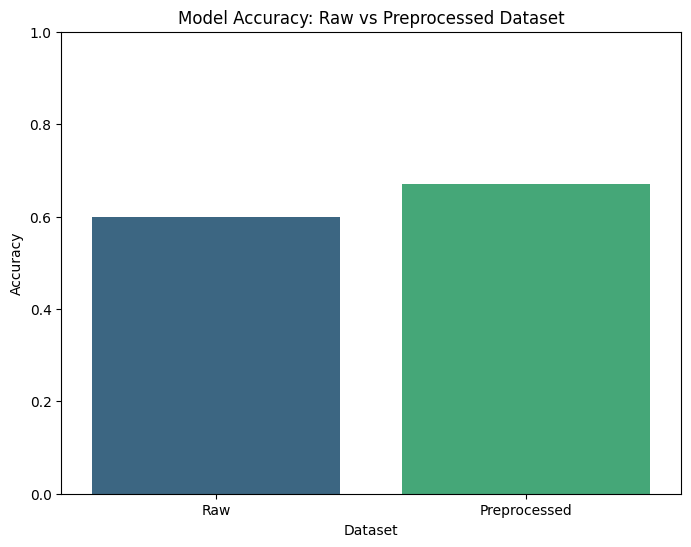

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for comparison (replace these with your actual accuracy values)
accuracy_raw = 0.60  # Accuracy on raw dataset
accuracy_preprocessed = 0.67  # Accuracy on preprocessed dataset

# Create a DataFrame for plotting
accuracy_data = {
    "Dataset": ["Raw", "Preprocessed"],
    "Accuracy": [accuracy_raw, accuracy_preprocessed]
}

accuracy_df = pd.DataFrame(accuracy_data)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="Dataset", y="Accuracy", data=accuracy_df, palette="viridis")
plt.title("Model Accuracy: Raw vs Preprocessed Dataset")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()

In [34]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [35]:
import streamlit as st
import matplotlib.pyplot as plt

# Streamlit app code to create the dashboard
st.title('Plant Disease Detection Dashboard')

# Display data distributions
st.subheader('Data Distribution Before and After Preprocessing')

# Display raw dataset distribution
st.write("Raw Data Distribution:")
st.write(df.describe())

# Model accuracy comparison
st.subheader('Model Accuracy Comparison')
st.write(f"Accuracy on Raw Dataset: {accuracy_raw:.2f}")
st.write(f"Accuracy on Preprocessed Dataset: {accuracy_preprocessed:.2f}")

# Visualize feature importance for Random Forest
feature_importance = rf_clf.feature_importances_
features = X.columns

plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
st.pyplot()

# Show more visualizations and performance metrics
st.subheader('Classification Report')
st.text(classification_report(y_test, y_pred))

2024-12-22 07:15:33.184 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 07:15:33.553 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-22 07:15:33.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 07:15:33.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 07:15:33.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 07:15:33.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 07:15:33.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 07:15:33.582 Thread 'MainThread': mi

DeltaGenerator()

<Figure size 640x480 with 0 Axes>